# Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('BD.csv')
df2 = pd.read_csv('mk.csv')
df3 = pd.read_csv('dg.csv')
df4 = pd.read_csv('pb.csv')
df5 = pd.read_csv('cm.csv')
df6 = pd.read_csv('gj.csv')
df7 = pd.read_csv('da.csv')
df8 = pd.read_csv('lc.csv')
df9 = pd.read_csv('md.csv')
df10 = pd.read_csv('hp.csv')
df11 = pd.read_csv('nm.csv')

In [3]:
df = df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df

,Unnamed: 0,Airline,Source,Destination,Departure,Arrival,Duration,Total_stops,Price
0,0,SpiceJet,BLR,DEL,9:50 PM,12:35 AM+1,2 hr 45 min,Nonstop,"7,089"
1,1,GO FIRST,BLR,DEL,9:00 PM,11:45 PM,2 hr 45 min,Nonstop,"7,332"
2,2,Air India,BLR,DEL,10:00 AM,12:50 PM,2 hr 50 min,Nonstop,"7,685"
3,3,GO FIRST,BLR,DEL,5:45 AM,8:25 AM,2 hr 40 min,Nonstop,"7,332"
4,4,GO FIRST,BLR,DEL,5:30 AM,2:30 PM,9 hr,1 stop,"7,333"
...,...,...,...,...,...,...,...,...,...
111,111,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655"
112,112,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655"
113,113,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:10 PM,9 hr 5 min,1 stop,"68,409"
114,114,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:55 AM+1,21 hr 50 min,1 stop,"68,409"


In [4]:
df = df.reset_index(drop=True)
df

,Unnamed: 0,Airline,Source,Destination,Departure,Arrival,Duration,Total_stops,Price
0,0,SpiceJet,BLR,DEL,9:50 PM,12:35 AM+1,2 hr 45 min,Nonstop,"7,089"
1,1,GO FIRST,BLR,DEL,9:00 PM,11:45 PM,2 hr 45 min,Nonstop,"7,332"
2,2,Air India,BLR,DEL,10:00 AM,12:50 PM,2 hr 50 min,Nonstop,"7,685"
3,3,GO FIRST,BLR,DEL,5:45 AM,8:25 AM,2 hr 40 min,Nonstop,"7,332"
4,4,GO FIRST,BLR,DEL,5:30 AM,2:30 PM,9 hr,1 stop,"7,333"
...,...,...,...,...,...,...,...,...,...
2096,111,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655"
2097,112,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655"
2098,113,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:10 PM,9 hr 5 min,1 stop,"68,409"
2099,114,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:55 AM+1,21 hr 50 min,1 stop,"68,409"


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,Airline,Source,Destination,Departure,Arrival,Duration,Total_stops,Price
0,SpiceJet,BLR,DEL,9:50 PM,12:35 AM+1,2 hr 45 min,Nonstop,"7,089"
1,GO FIRST,BLR,DEL,9:00 PM,11:45 PM,2 hr 45 min,Nonstop,"7,332"
2,Air India,BLR,DEL,10:00 AM,12:50 PM,2 hr 50 min,Nonstop,"7,685"
3,GO FIRST,BLR,DEL,5:45 AM,8:25 AM,2 hr 40 min,Nonstop,"7,332"
4,GO FIRST,BLR,DEL,5:30 AM,2:30 PM,9 hr,1 stop,"7,333"
...,...,...,...,...,...,...,...,...
2096,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655"
2097,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655"
2098,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:10 PM,9 hr 5 min,1 stop,"68,409"
2099,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:55 AM+1,21 hr 50 min,1 stop,"68,409"


In [7]:
df.shape

(2101, 8)

In [8]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Departure', 'Arrival', 'Duration',
       'Total_stops', 'Price'],
      dtype='object')

### About the Columns

Airline - The name of Airline.

Source - The source from which the service begins.

Destination - The destination where the service ends.

Departure - The time when journey starts from the source.

Arrival - Time of arrival at the destination.

Duration - Total duration of the flight.

Total_Stops - Total stops between the source and destination.

Price - The price of the Ticket

In [9]:
df.dtypes

Airline        object
Source         object
Destination    object
Departure      object
Arrival        object
Duration       object
Total_stops    object
Price          object
dtype: object

In [10]:
df.Price.value_counts()

8,073     58
19,991    47
12,168    42
7,384     36
11,232    35
          ..
8,923      1
13,683     1
15,403     1
9,288      1
28,189     1
Name: Price, Length: 634, dtype: int64

In [11]:
df.isnull().sum()

Airline        1
Source         0
Destination    0
Departure      1
Arrival        1
Duration       0
Total_stops    0
Price          0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2100
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      2100 non-null   object
 1   Source       2100 non-null   object
 2   Destination  2100 non-null   object
 3   Departure    2100 non-null   object
 4   Arrival      2100 non-null   object
 5   Duration     2100 non-null   object
 6   Total_stops  2100 non-null   object
 7   Price        2100 non-null   object
dtypes: object(8)
memory usage: 147.7+ KB


In [14]:
df['Dep_hour'] = pd.to_datetime(df["Departure"]).dt.hour
df["Dep_min"] = pd.to_datetime(df['Departure']).dt.minute

In [15]:
df

,Airline,Source,Destination,Departure,Arrival,Duration,Total_stops,Price,Dep_hour,Dep_min
0,SpiceJet,BLR,DEL,9:50 PM,12:35 AM+1,2 hr 45 min,Nonstop,"7,089",21,50
1,GO FIRST,BLR,DEL,9:00 PM,11:45 PM,2 hr 45 min,Nonstop,"7,332",21,0
2,Air India,BLR,DEL,10:00 AM,12:50 PM,2 hr 50 min,Nonstop,"7,685",10,0
3,GO FIRST,BLR,DEL,5:45 AM,8:25 AM,2 hr 40 min,Nonstop,"7,332",5,45
4,GO FIRST,BLR,DEL,5:30 AM,2:30 PM,9 hr,1 stop,"7,333",5,30
...,...,...,...,...,...,...,...,...,...,...
2096,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655",7,40
2097,"Air India, Gulf Air",NAG,BOM,7:40 AM,4:55 AM+2,45 hr 15 min,2 stops,"55,655",7,40
2098,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:10 PM,9 hr 5 min,1 stop,"68,409",5,5
2099,"Qatar Airways, IndiGo",NAG,BOM,5:05 AM,2:55 AM+1,21 hr 50 min,1 stop,"68,409",5,5


In [16]:
df.drop('Departure',axis=1,inplace=True)

### Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'GO FIRST'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'AirAsia (India)'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SriLankan'),
  Text(7, 0, 'Oman Air'),
  Text(8, 0, 'Emirates'),
  Text(9, 0, 'THAI'),
  Text(10, 0, 'Emirates, flydubai'),
  Text(11, 0, 'Gulf Air'),
  Text(12, 0, 'Etihad'),
  Text(13, 0, 'THAI, Thai Smile'),
  Text(14, 0, 'Singapore Airlines'),
  Text(15, 0, 'flydubai, Emirates'),
  Text(16, 0, 'Air India, Biman'),
  Text(17, 0, 'IndiGo, Qatar Airways'),
  Text(18, 0, 'Qatar Airways'),
  Text(19, 0, 'Singapore Airlines, Biman'),
  Text(20, 0, 'Etihad, Biman'),
  Text(21, 0, 'Air Arabia, Etihad, Biman'),
  Text(22, 0, 'SriLankan, Air India'),
  Text(23, 0, 'Air India, SriLankan'),
  Text(24, 0, 'Oman Air, Air India'),
  Text(25, 0, 'Kuwait Airways'),
  Text(26, 0, 

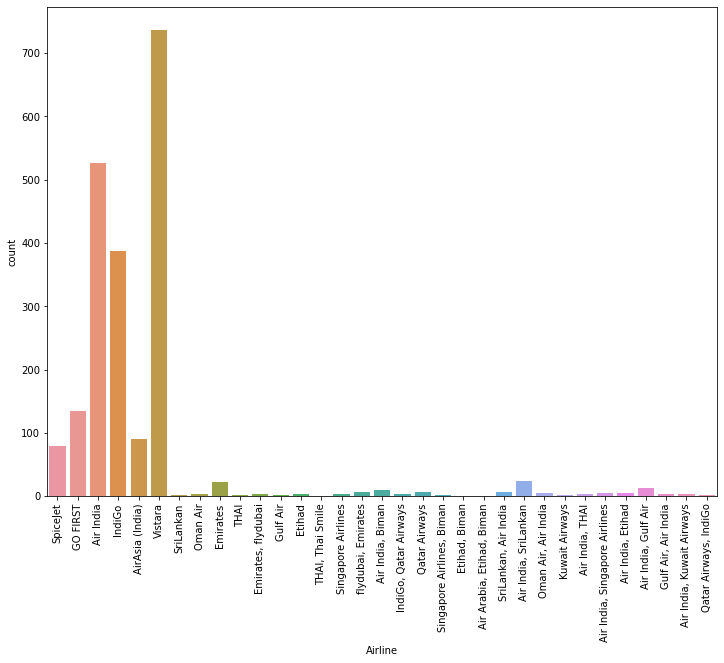

In [17]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'Airline',data=df,)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Source', ylabel='count'>

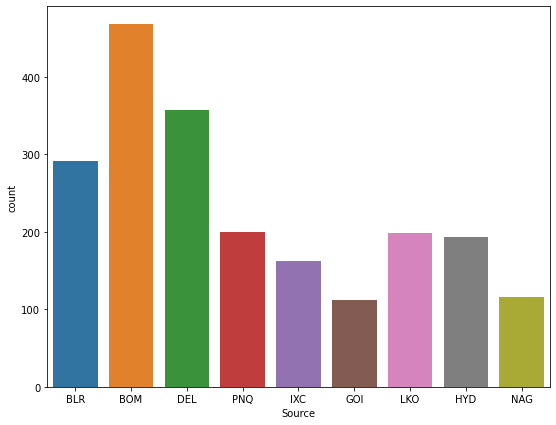

In [18]:
plt.figure(figsize=(9,7))
sns.countplot(x = 'Source',data=df)

<AxesSubplot:xlabel='Destination', ylabel='count'>

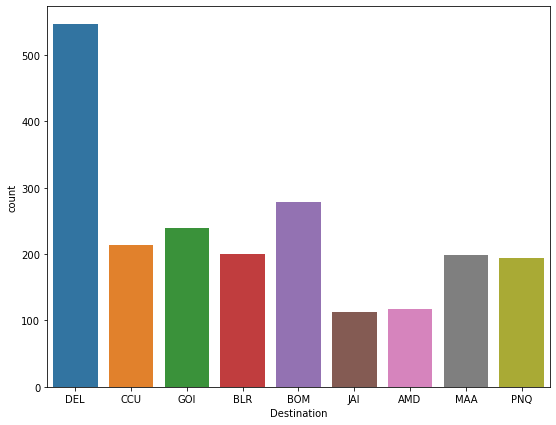

In [19]:
plt.figure(figsize=(9,7))
sns.countplot(x = 'Destination',data=df)

### Description

In [20]:
df.describe()

,Dep_hour,Dep_min
count,2100.000000,2100.000000
mean,13.132381,27.671429
std,5.781688,17.532564
min,0.000000,0.000000
25%,7.000000,15.000000
50%,14.000000,30.000000
75%,18.000000,40.000000
max,23.000000,55.000000


### Correlation

In [21]:
df.corr()

,Dep_hour,Dep_min
Dep_hour,1.000000,0.031735
Dep_min,0.031735,1.000000


<AxesSubplot:>

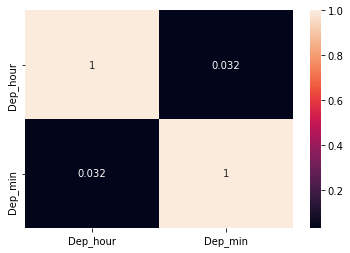

In [22]:
sns.heatmap(df.corr(),annot=True)

### Ddata Conversion

In [23]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()

In [24]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = lec.fit_transform(df[i])

In [25]:
df

,Airline,Source,Destination,Arrival,Duration,Total_stops,Price,Dep_hour,Dep_min
0,26,0,4,91,131,3,500,21,50
1,14,0,4,67,131,3,508,21,0
2,1,0,4,106,133,3,531,10,0
3,14,0,4,338,130,3,508,5,45
4,14,0,4,161,389,0,509,5,30
...,...,...,...,...,...,...,...,...,...
2096,4,7,2,221,330,1,476,7,40
2097,4,7,2,221,330,1,476,7,40
2098,23,7,2,149,398,0,498,5,5
2099,23,7,2,171,155,0,498,5,5


### Splitting Data into x and y

In [26]:
x = df.drop('Price',axis=1)
x

,Airline,Source,Destination,Arrival,Duration,Total_stops,Dep_hour,Dep_min
0,26,0,4,91,131,3,21,50
1,14,0,4,67,131,3,21,0
2,1,0,4,106,133,3,10,0
3,14,0,4,338,130,3,5,45
4,14,0,4,161,389,0,5,30
...,...,...,...,...,...,...,...,...
2096,4,7,2,221,330,1,7,40
2097,4,7,2,221,330,1,7,40
2098,23,7,2,149,398,0,5,5
2099,23,7,2,171,155,0,5,5


In [27]:
y = df['Price']
y

0       500
1       508
2       531
3       508
4       509
       ... 
2096    476
2097    476
2098    498
2099    498
2100    543
Name: Price, Length: 2100, dtype: int32

### Scaling the Model

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
hs = sc.fit_transform(x)

### Training Process

In [29]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr = LinearRegression()

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Random State

In [30]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_tr = lr.predict(x_train)
    pred_ts = lr.predict(x_test)
    print(f"At random state {i},the training accuracy is : {r2_score(y_train,pred_tr)}")
    print(f"At random state {i},the testing accuracy is : {r2_score(y_test,pred_ts)}")
    print("\n")


At random state 0,the training accuracy is : 0.06411727159543779
At random state 0,the testing accuracy is : 0.03885874759609276


At random state 1,the training accuracy is : 0.05889399627027969
At random state 1,the testing accuracy is : 0.05161997163165044


At random state 2,the training accuracy is : 0.0628295629049761
At random state 2,the testing accuracy is : 0.037810662136198325


At random state 3,the training accuracy is : 0.05284756832737003
At random state 3,the testing accuracy is : 0.06010772346837934


At random state 4,the training accuracy is : 0.055479849308709306
At random state 4,the testing accuracy is : 0.05796497643651344


At random state 5,the training accuracy is : 0.06907538636737864
At random state 5,the testing accuracy is : 0.023609762269572565


At random state 6,the training accuracy is : 0.06077606346622755
At random state 6,the testing accuracy is : 0.04816209532309157


At random state 7,the training accuracy is : 0.06537246391480656
At random state 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=1)

In [32]:
x_train.shape

(1575, 8)

In [33]:
y_train.shape

(1575,)

In [34]:
x_test.shape

(525, 8)

In [35]:
y_test.shape

(525,)

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
pred_ts = lr.predict(x_test)

In [38]:
print(r2_score(y_test,pred_ts))

0.05116080184928318
